In [2]:
import pandas as pd
import numpy as np
import mlflow
#mlflow.autolog()
#mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [3]:
df = pd.read_csv("C://data-49159-2023-03-17.csv", delimiter=';', encoding='windows-1251')
df.head()

,ID,Period,global_id,StationName,SurveillanceZoneCharacteristics,AdmArea,District,Location,Parameter,MonthlyAverage,...,Period_en,StationName_en,SurveillanceZoneCharacteristics_en,AdmArea_en,District_en,Location_en,Parameter_en,MonthlyAverage_en,MonthlyAveragePDKss_en,Unnamed: 21
0,Код,Период измерения,global_id,Название станции,Характеристика зоны наблюдения,Административный округ,Район,Адресный ориентир,Измеряемый параметр,Среднее значение в абсолютных единицах,...,Period_en,StationName_en,SurveillanceZoneCharacteristics_en,AdmArea_en,District_en,Location_en,Parameter_en,MonthlyAverage_en,MonthlyAveragePDKss_en,NaN
1,1,02.2016,272777248,Лосиный остров,Природные территории,Восточный административный округ,район Метрогородок,"улица Ротерта, дом 4, строение 5",Оксид углерода,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,02.2016,272777249,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Оксид углерода,0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,02.2016,272777250,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Сероводород,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,02.2016,272777251,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Оксид азота,0.014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#df = df.drop(axis=0, index=0)
df = df[['Period', 'StationName', 'District', 'Parameter', 'MonthlyAverage', 'MonthlyAveragePDKss']]
df = df[df['Parameter']=='Оксид углерода']
df.head()

,Period,StationName,District,Parameter,MonthlyAverage,MonthlyAveragePDKss
1,02.2016,Лосиный остров,район Метрогородок,Оксид углерода,0.19,0.06
2,02.2016,Глебовская,район Богородское,Оксид углерода,0.32,0.11
9,02.2016,Кожухово,район Косино-Ухтомский,Оксид углерода,0.22,0.07
18,02.2016,Новокосино,район Новокосино,Оксид углерода,0.34,0.11
24,02.2016,МГУ,район Раменки,Оксид углерода,0.29,0.1


In [5]:
df1 = pd.DataFrame({
    'Period':['2.2016', '3.2016', '4.2016', '5.2016', '6.2016', '7.2016', '8.2016', '9.2016', '10.2016', '11.2016', '12.2016',
             '1.2017', '2.2017', '3.2017', '4.2017', '5.2017', '6.2017', '7.2017', '8.2017', '9.2017', '10.2017', '11.2017', '12.2017', 
            '1.2018', '2.2018', '3.2018', '4.2018', '5.2018', '6.2018', '7.2018', '8.2018', '9.2018', '10.2018', '11.2018', '12.2018',
            '1.2019', '2.2019', '3.2019', '4.2019', '5.2019', '6.2019', '7.2019', '8.2019', '9.2019', '10.2019', '11.2019', '12.2019',
            '1.2020', '2.2020', '3.2020', '4.2020', '5.2020', '6.2020', '7.2020', '8.2020', '9.2020', '10.2020', '11.2020', '12.2020',
            '1.2021', '2.2021', '3.2021', '4.2021', '5.2021', '6.2021', '7.2021', '8.2021', '9.2021', '10.2021', '11.2021', '12.2021',
            '1.2022', '2.2022', '3.2022', '4.2022', '5.2022', '6.2022', '7.2022', '8.2022', '9.2022', '10.2022', '11.2022', '12.2022', 
             '1.2023', '2.2023', '3.2023'],
    'temp':[-0.6, 0.3, 8.1, 15.0, 18.2, 20.9, 19.5, 11.4, 4.4, -2.7, -4.6,
                             -7.8, -4.6, 2.4, 5.3, 10.9, 14.4, 17.9, 18.8, 13.0, 5.0, 0.0, 0.0, 
                             -4.3, -9.1, -5.1, 7.8, 16.2, 17.3, 20.5, 19.8, 14.6,  7.3, -0.6, -5.6, 
                             -6.6, -1.4, 0.7, 8.1, 16.3, 19.6, 16.8, 16.4, 12.3, 8.8, 1.8, 0.8, 
                              0.1, -0.3, 3.8, 4.8, 11.7, 18.9, 18.7, 17.6, 13.9, 9.2, 2.2, -4.4,
                             -5.8, -10.5, -1.3, 7.5, 14.3, 20.5, 22.2, 19.5, 9.9, 6.4, 2.3, -7.0, 
                             -5.4, -0.9, -0.7, 5.8, 10.7, 18.9, 20.7, 21.9, 10.1, 7.2, -0.6, -4.1,
                             -4.7, -4.1, 1.3]})
df1.head()

,Period,temp
0,2.2016,-0.6
1,3.2016,0.3
2,4.2016,8.1
3,5.2016,15.0
4,6.2016,18.2


In [6]:
df = pd.merge(df, df1,
                       how='left', on='Period')
df.head()

,Period,StationName,District,Parameter,MonthlyAverage,MonthlyAveragePDKss,temp
0,02.2016,Лосиный остров,район Метрогородок,Оксид углерода,0.19,0.06,NaN
1,02.2016,Глебовская,район Богородское,Оксид углерода,0.32,0.11,NaN
2,02.2016,Кожухово,район Косино-Ухтомский,Оксид углерода,0.22,0.07,NaN
3,02.2016,Новокосино,район Новокосино,Оксид углерода,0.34,0.11,NaN
4,02.2016,МГУ,район Раменки,Оксид углерода,0.29,0.1,NaN


In [7]:
df = df[df.District == 'район Новокосино'][['Period', 'MonthlyAverage']]


In [8]:
df['Period'][1776] = '01.2020'
df['Period'][1817] = '02.2020'
df['Period'][1857] = '03.2020'
df['Period'][1902] = '04.2020'
df['Period'][1943] = '05.2020'
df['Period'][1984] = '06.2020'
df['Period'][2019] = '07.2020'
df['Period'][2053] = '08.2020'
df['Period'][2097] = '09.2020'
df['Period'][2141] = '10.2020'
df['Period'][2184] = '11.2020'
df['Period'][2230] = '12.2020'

In [9]:
df['Period'].head(60)

3       02.2016
44      03.2016
85      04.2016
126     05.2016
166     06.2016
205     07.2016
246     08.2016
285     09.2016
323     10.2016
361     11.2016
398     12.2016
436     01.2017
474     02.2017
512     03.2017
548     05.2017
588     06.2017
625     07.2017
661     08.2017
693     09.2017
731     10.2017
764     11.2017
797     01.2018
869     02.2018
910     03.2018
945     04.2018
974     05.2018
995     06.2018
1030    07.2018
1066    08.2018
1101    09.2018
1136    10.2018
1207    11.2018
1215    12.2018
1254    01.2019
1298    02.2019
1342    03.2019
1386    04.2019
1429    05.2019
1472    06.2019
1514    07.2019
1556    08.2019
1599    09.2019
1644    10.2019
1688    11.2019
1732    12.2019
1776    01.2020
1817    02.2020
1857    03.2020
1902    04.2020
1943    05.2020
1984    06.2020
2019    07.2020
2053    08.2020
2097    09.2020
2141    10.2020
2184    11.2020
2230    12.2020
2276    01.2021
2322    02.2021
2369    03.2021
Name: Period, dtype: object

In [10]:
df = df.astype({'MonthlyAverage': float})
df['Period'] = pd.to_datetime(df['Period'], format='%m.%Y')
df = df.set_index('Period')

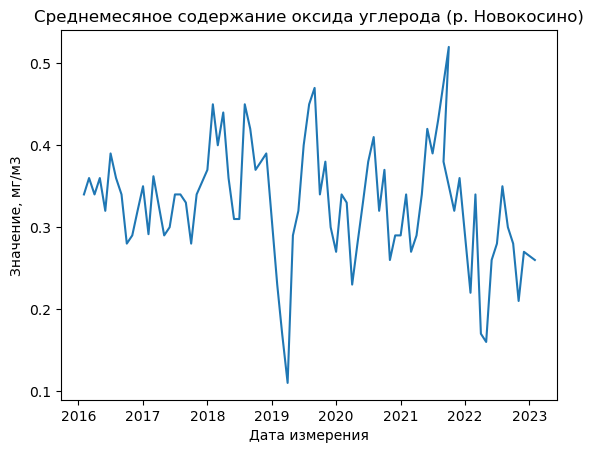

In [11]:
import matplotlib.pyplot as plt
# построение графика временных рядов
plt.plot(df)
plt.title('Среднемесяное содержание оксида углерода (р. Новокосино)')
plt.xlabel('Дата измерения')
plt.ylabel('Значение, мг/м3')
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tbats import TBATS
from prophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-185.149, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-167.723, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-188.055, Time=0.29 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-181.341, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=47.516, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-189.943, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-188.043, Time=0.11 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-186.427, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=-188.435, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-188.187, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-183.341, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-187.073, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=-173.007, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 2.091 seconds
Auto ARIMA

C:\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


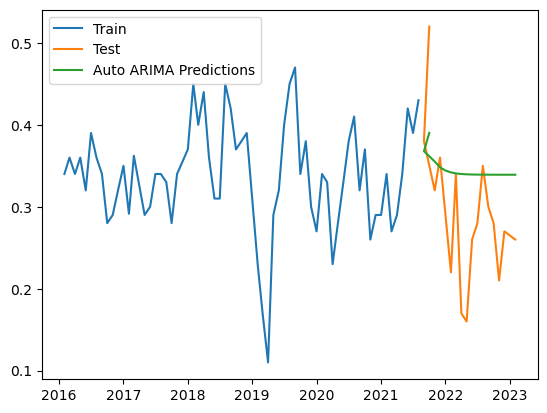

In [13]:
from pmdarima.arima import auto_arima

# Automatic ARIMA
auto_arima_model = auto_arima(train['MonthlyAverage'], seasonal=True, 
                              m=12, trace=True, error_action='ignore', suppress_warnings=True)
auto_arima_model.fit(train['MonthlyAverage'])

# ARIMA predictions
auto_arima_pred = auto_arima_model.predict(n_periods=len(test))
auto_arima_mse = mean_squared_error(test['MonthlyAverage'], auto_arima_pred)
print("Auto ARIMA MSE:", auto_arima_mse)

# Plotting the actual vs predicted values
plt.plot(train.index, train['MonthlyAverage'], label='Train')
plt.plot(test.index, test['MonthlyAverage'], label='Test')
plt.plot(test.index, auto_arima_pred, label='Auto ARIMA Predictions')
plt.legend(loc='best')
plt.show()


TBATS MSE: 0.007565624425382693


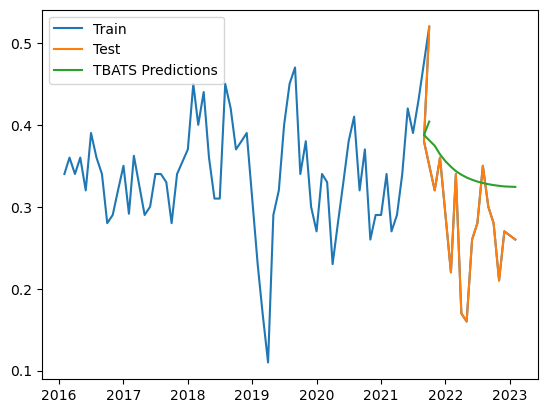

In [14]:
# TBATS
tbats_model = TBATS(seasonal_periods=[12, 24])
tbats_result = tbats_model.fit(train['MonthlyAverage'])

# TBATS predictions
tbats_pred = tbats_result.forecast(steps=len(test))
tbats_mse = mean_squared_error(test['MonthlyAverage'], tbats_pred)
print("TBATS MSE:", tbats_mse)

# Plotting the actual vs predicted values
plt.plot(df.index, df['MonthlyAverage'], label='Train')
plt.plot(test.index, test['MonthlyAverage'], label='Test')
plt.plot(test.index, tbats_pred, label='TBATS Predictions')
plt.legend(loc='best')
plt.show()

In [15]:
# Подготовка данных для LSTM
lstm_df = df['MonthlyAverage'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
lstm_df = scaler.fit_transform(lstm_df)

# Разделение на тренировочную и тестовую выборки
train_size = int(len(lstm_df) * 0.7)
test_size = len(lstm_df) - train_size
train_lstm, test_lstm = lstm_df[0:train_size,:], lstm_df[train_size:len(lstm_df),:]

# Создание X и y
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 12
trainX, trainY = create_dataset(train_lstm, look_back)
testX, testY = create_dataset(test_lstm, look_back)

# Решейпинг данных для LSTM
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Создание и обучение LSTM-модели
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Прогнозирование на тестовой выборке
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)

# Вычисление MSE
mse_lstm = ((testPredict[:,0] - testY) ** 2).mean()
print('MSE LSTM:', mse_lstm)


Epoch 1/100
44/44 - 3s - loss: 0.1586 - 3s/epoch - 59ms/step
Epoch 2/100
44/44 - 0s - loss: 0.0556 - 126ms/epoch - 3ms/step
Epoch 3/100
44/44 - 0s - loss: 0.0327 - 132ms/epoch - 3ms/step
Epoch 4/100
44/44 - 0s - loss: 0.0325 - 130ms/epoch - 3ms/step
Epoch 5/100
44/44 - 0s - loss: 0.0314 - 129ms/epoch - 3ms/step
Epoch 6/100
44/44 - 0s - loss: 0.0318 - 120ms/epoch - 3ms/step
Epoch 7/100
44/44 - 0s - loss: 0.0312 - 130ms/epoch - 3ms/step
Epoch 8/100
44/44 - 0s - loss: 0.0311 - 140ms/epoch - 3ms/step
Epoch 9/100
44/44 - 0s - loss: 0.0314 - 130ms/epoch - 3ms/step
Epoch 10/100
44/44 - 0s - loss: 0.0310 - 133ms/epoch - 3ms/step
Epoch 11/100
44/44 - 0s - loss: 0.0315 - 130ms/epoch - 3ms/step
Epoch 12/100
44/44 - 0s - loss: 0.0309 - 127ms/epoch - 3ms/step
Epoch 13/100
44/44 - 0s - loss: 0.0303 - 133ms/epoch - 3ms/step
Epoch 14/100
44/44 - 0s - loss: 0.0304 - 130ms/epoch - 3ms/step
Epoch 15/100
44/44 - 0s - loss: 0.0300 - 127ms/epoch - 3ms/step
Epoch 16/100
44/44 - 0s - loss: 0.0303 - 132ms/epoc

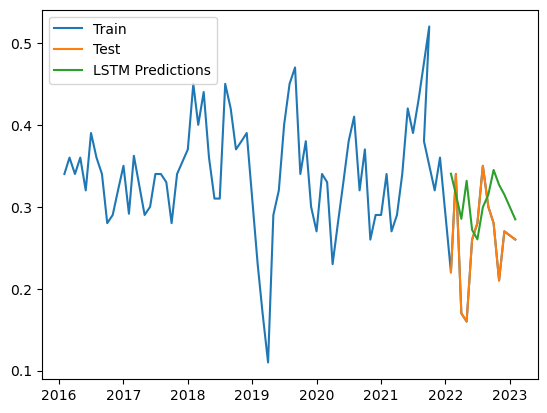

In [16]:
# Plotting the actual vs predicted values
plt.plot(df.index, df['MonthlyAverage'], label='Train')
plt.plot(test.index[5:], test['MonthlyAverage'][5:], label='Test')
plt.plot(test.index[5:], testPredict[:,0], label='LSTM Predictions')
plt.legend(loc='best')
plt.show()

In [17]:
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['MonthlyAverage'].to_numpy()})
# Обучение модели
m = Prophet()
m.fit(df_prophet)

# Прогнозирование на тестовой выборке
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

# Вычисление MSE
mse_prophet = ((forecast['yhat'][:len(df)] - df['MonthlyAverage'].to_numpy()) ** 2).mean()
print('MSE Prophet:', mse_prophet)


13:06:39 - cmdstanpy - INFO - Chain [1] start processing
13:06:40 - cmdstanpy - INFO - Chain [1] done processing


MSE Prophet: 0.0035511259429217143


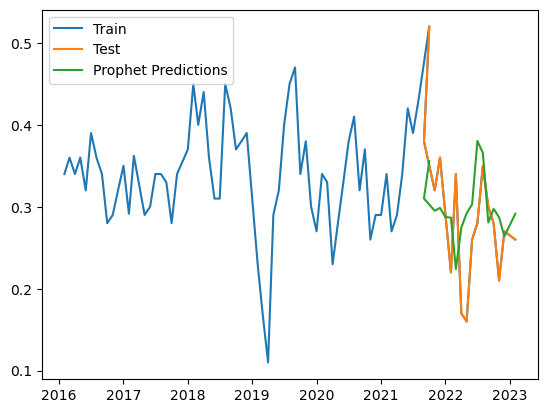

In [18]:
# Plotting the actual vs predicted values
plt.plot(df.index, df['MonthlyAverage'], label='Train')
plt.plot(test.index, test['MonthlyAverage'], label='Test')
plt.plot(test.index, forecast['yhat'][77:], label='Prophet Predictions')
plt.legend(loc='best')
plt.show()

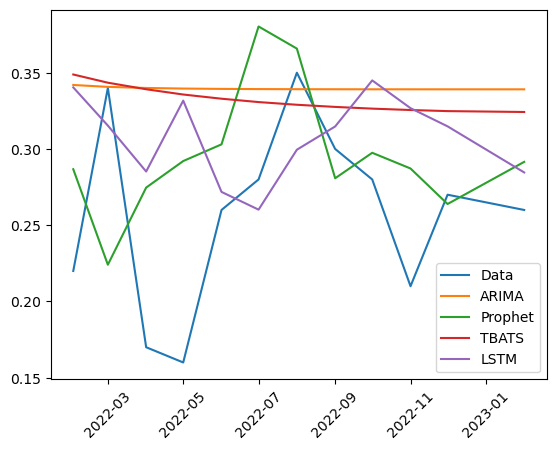

In [21]:
# Plotting the actual vs predicted values
plt.plot(test.index[5:], test['MonthlyAverage'][5:], label='Data')
plt.plot(test.index[5:], auto_arima_pred[5:], label='ARIMA')
plt.plot(test.index[5:], forecast['yhat'][82:], label='Prophet')
plt.plot(test.index[5:], tbats_pred[5:], label='TBATS')
plt.plot(test.index[5:], testPredict[:,0], label='LSTM')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()